 Import Libraries

In [1]:
import pandas as pd 
import numpy as numpy
import os
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Load the Data

In [5]:
df=pd.read_csv("../Data/raw/MachineLearningRating_v3.txt",delimiter="|")

/tmp/ipykernel_11161/913990494.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../Data/raw/MachineLearningRating_v3.txt",delimiter="|")


In [6]:
# Initial view
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [7]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [8]:
df.dtypes
df.describe(include="all")

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1000098,1000098,1000098,1000098,1000098,854137,959866,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1.000098e+06,1.000098e+06
unique,NaN,NaN,23,2,4,6,5,1,11,3,...,13,28,22,14,5,4,1,1,NaN,NaN
top,NaN,NaN,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN
freq,NaN,NaN,106747,995075,895210,911929,933555,1000098,260811,597938,...,791235,104158,104183,824124,828125,915028,1000098,1000098,NaN,NaN
mean,1.048175e+05,7.956682e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.192982e+01,0.000000e+00


In [9]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [10]:
# Core numerical summaries
df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe()

,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


Convert Dates

In [11]:
df["TransactionMonth"]=pd.to_datetime(df["TransactionMonth"])

In [12]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


Data Quality Assessment

Missing Values

In [13]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

Univariate Analysis

Numerical Variables

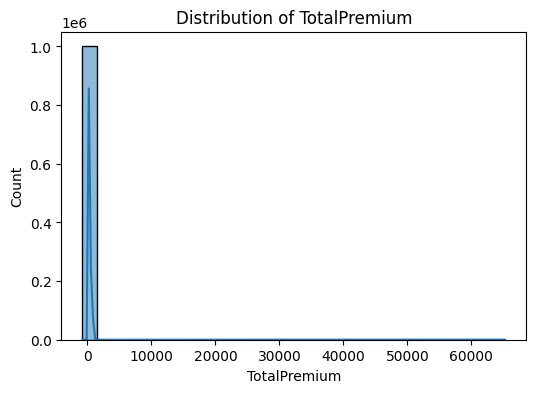

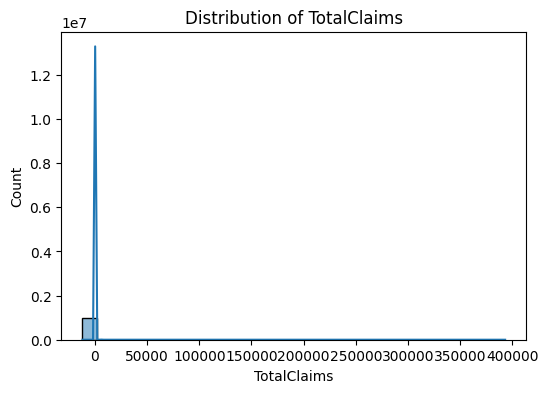

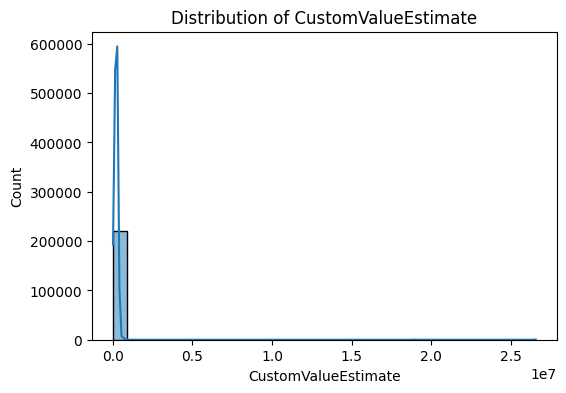

In [14]:
num_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


Categorical Variables

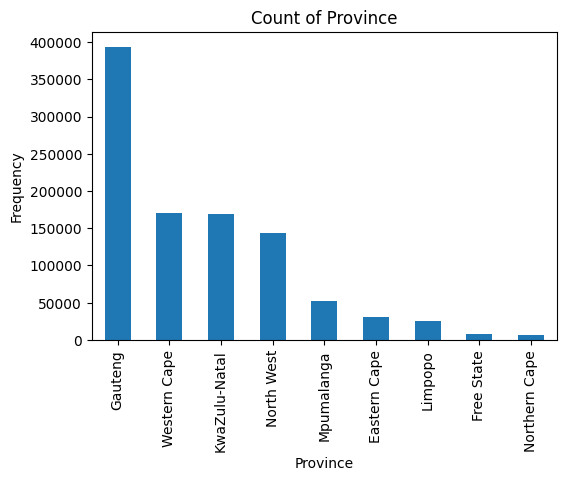

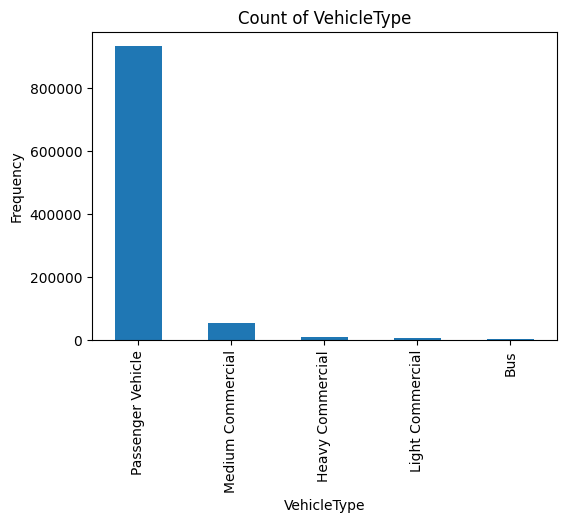

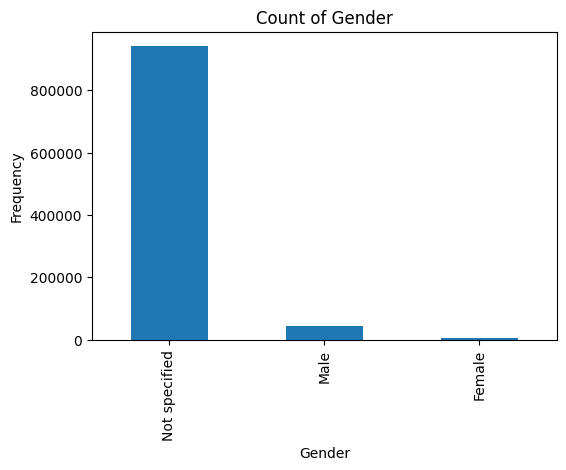

In [15]:
cat_cols = ['Province', 'VehicleType', 'Gender']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.ylabel('Frequency')
    plt.show()


Outlier Detection

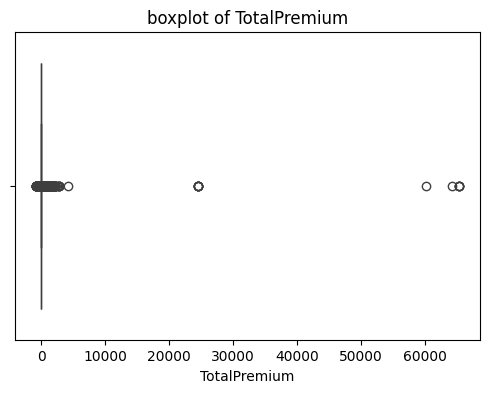

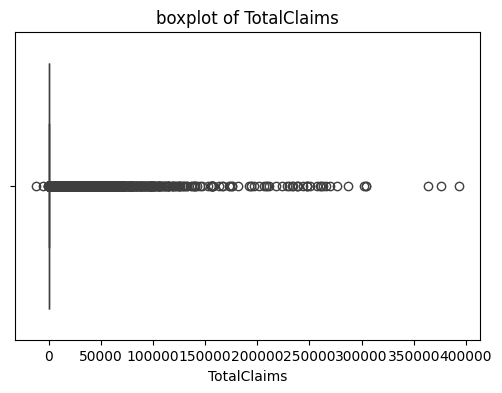

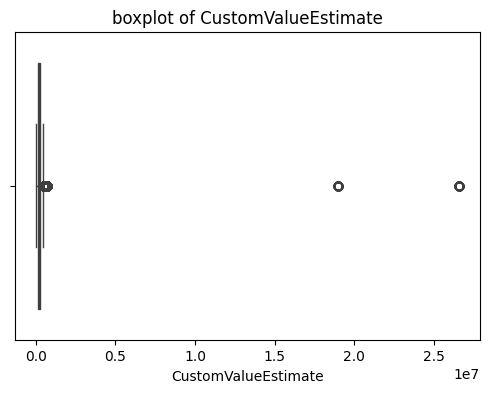

In [16]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

Bivariate / Multivariate Analysis

Loss Ratio Calculation

In [17]:
df["LossRatio"]=df["TotalClaims"]/df["TotalPremium"]
tot_claim = df['TotalClaims'].sum()
tot_premium = df['TotalPremium'].sum()
print(tot_claim/tot_premium)

1.0477452570332206


In [18]:
print(df["LossRatio"])
print(df['LossRatio'].sum())

0          0.0
1          0.0
2          NaN
3          0.0
4          NaN
          ... 
1000093    0.0
1000094    0.0
1000095    0.0
1000096    0.0
1000097    0.0
Name: LossRatio, Length: 1000098, dtype: float64
nan


/home/haile/hailes/kifiya/week3/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Province
Northern Cape    0.203831
Eastern Cape          inf
KwaZulu-Natal         inf
Free State            inf
Limpopo               inf
North West            inf
Western Cape          inf
Gauteng               NaN
Mpumalanga            NaN
Name: LossRatio, dtype: float64


/home/haile/hailes/kifiya/week3/.venv/lib/python3.13/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/home/haile/hailes/kifiya/week3/.venv/lib/python3.13/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


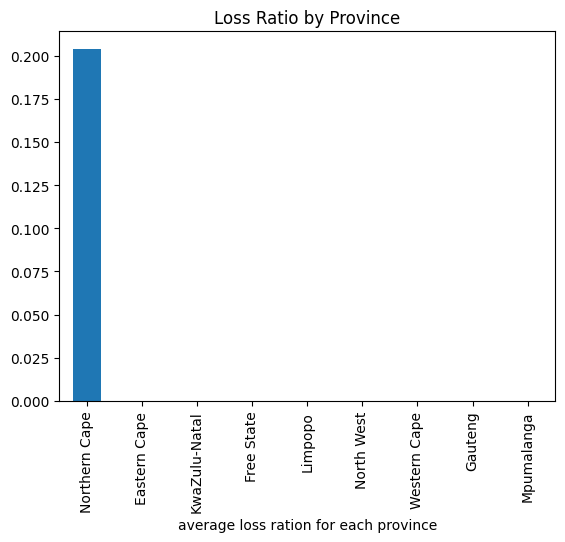

In [19]:
x=df.groupby("Province")["LossRatio"].mean().sort_values()
print(x)
x.plot(kind="bar",title="Loss Ratio by Province")
plt.xlabel("average loss ration for each province")
plt.show()

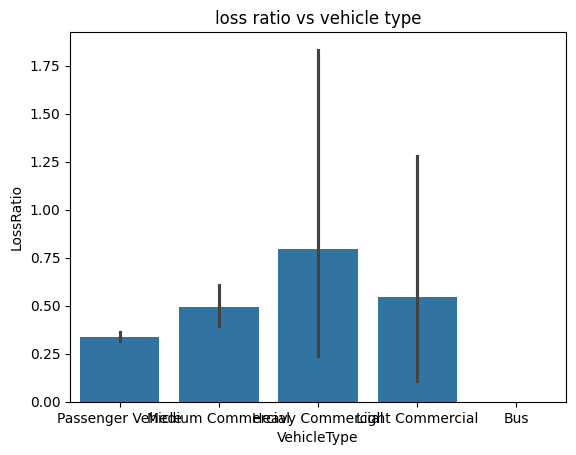

In [21]:
sns.barplot(x='VehicleType',y='LossRatio', data=df)
plt.title("loss ratio vs vehicle type")
plt.show()

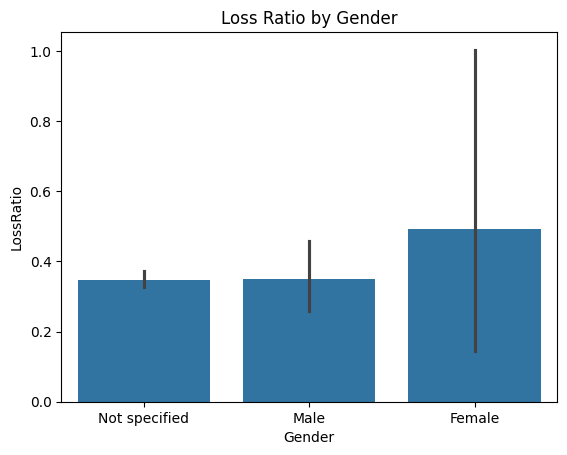

In [22]:
sns.barplot(x='Gender', y='LossRatio', data=df)
plt.title('Loss Ratio by Gender')
plt.show()


Temporal Trend Analysis

0    2015-03
1    2015-05
2    2015-07
3    2015-05
4    2015-07
Name: Month, dtype: period[M]


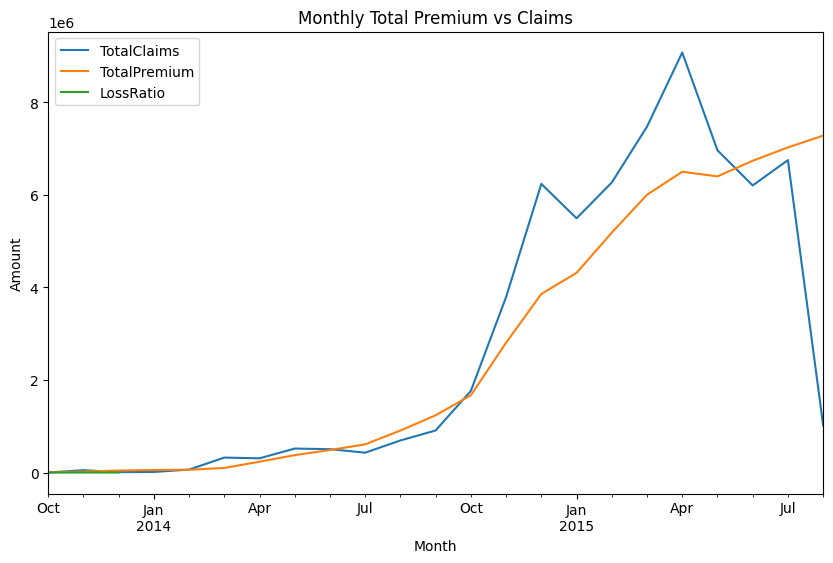

In [23]:
# Assuming i have a 'ClaimDate' or 'PolicyStartDate'
df['Month'] = df['TransactionMonth'].dt.to_period('M')
print(df['Month'].head())
monthly = df.groupby('Month')[['TotalClaims', 'TotalPremium','LossRatio']].sum()
monthly_loss = df.groupby('Month')['LossRatio'].sum()

monthly.plot(figsize=(10,6), title='Monthly Total Premium vs Claims')
plt.ylabel('Amount')
plt.show()


Vehicle Model Risk Comparison

In [24]:
veicle_group_by_brand = df.groupby('make')['TotalClaims'].mean().sort_values()
print("Top 5 safest vehicles")
print(veicle_group_by_brand.head())
print("Top 5 riskiest vehicles")
print(veicle_group_by_brand.tail())

Top 5 safest vehicles
make
CITROEN                                0.0
CHERY                                  0.0
FORD                                   0.0
DAIHATSU                               0.0
GEELY                                  0.0
Name: TotalClaims, dtype: float64
Top 5 riskiest vehicles
make
AUDI                                   137.843083
MARCOPOLO                              156.794806
HYUNDAI                                174.215195
JMC                                    191.684795
SUZUKI                                 419.634546
Name: TotalClaims, dtype: float64


In [25]:
df['VehicleMakeModel'] = df['make'].astype(str).str.strip() + ' - ' + df['Model'].astype(str).str.strip()

vehicle_group = df.groupby('VehicleMakeModel')['TotalClaims'].mean().sort_values()

print("Top 5 safest vehicles:")
print(vehicle_group.head(5))

print("\nTop 5 riskiest vehicles:")
print(vehicle_group.tail(5))


Top 5 safest vehicles:
VehicleMakeModel
MERCEDES-BENZ - C200K CLASSIC A/T      -0.250832
MERCEDES-BENZ - VITO 116 CDi CREWBUS    0.000000
NISSAN - ALMERA 1.6 LUXURY (H02)        0.000000
RENAULT - SCENIC 1.9 dCi EXPRESSION     0.000000
NISSAN - ALMERA 1.6 COMFORT (H01)       0.000000
Name: TotalClaims, dtype: float64

Top 5 riskiest vehicles:
VehicleMakeModel
VOLKSWAGEN - POLO VIVO 1.6 5Dr           827.558882
nan - nan                               1008.489085
FIAT - DUCATO 2.3 JTD VETRATO           1014.681021
HYUNDAI - H-1 2.5 CRDI WAGON A/T        4118.181043
TOYOTA - L/CRUISER FJ 4.0 V6 CRUISER    5340.970273
Name: TotalClaims, dtype: float64


Correlation & ZipCode Exploration

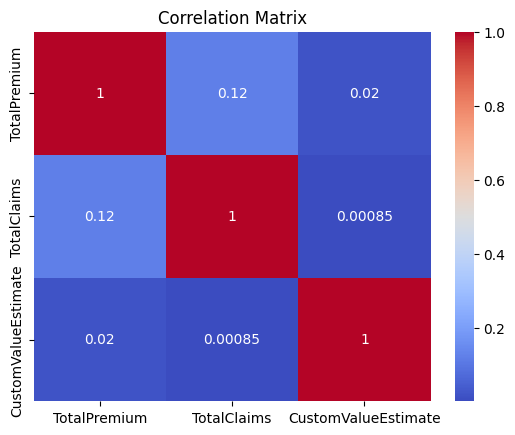

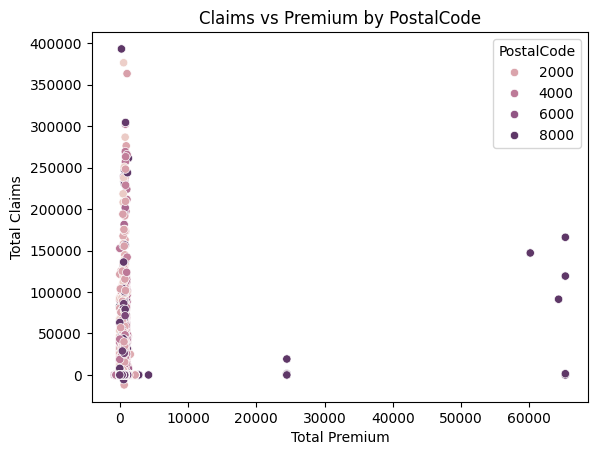

In [26]:
# Correlation matrix
corr = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=df)
plt.title('Claims vs Premium by PostalCode')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()


Trends Over Geography

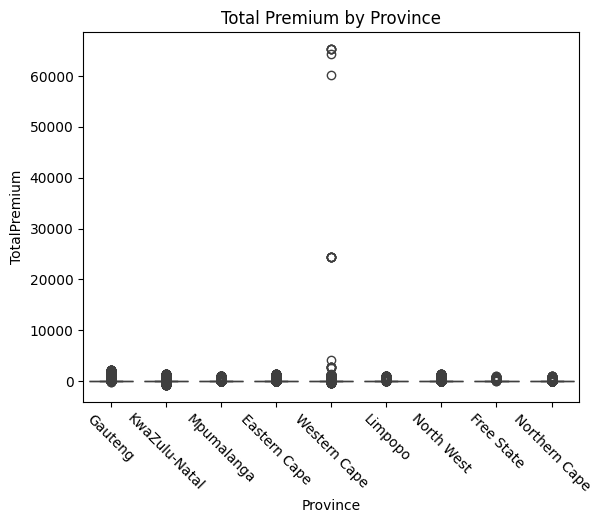

In [27]:
sns.boxplot(x='Province', y='TotalPremium', data=df)
plt.title('Total Premium by Province')
plt.xticks(rotation=-45)
plt.show()


Creative Visualizations

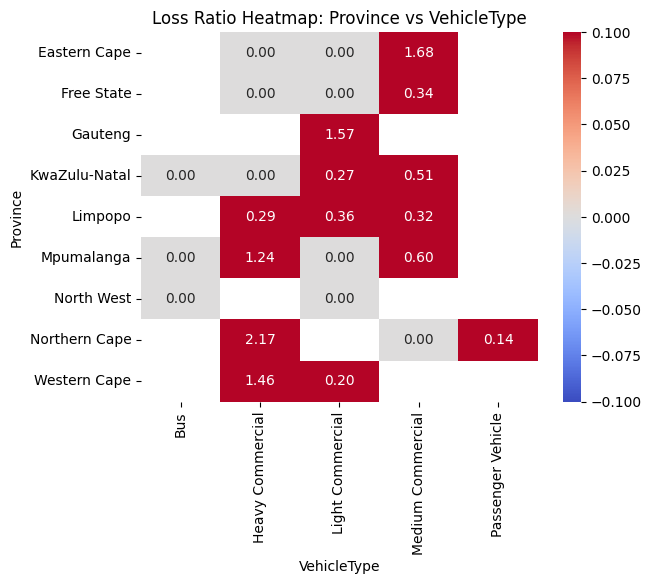

In [28]:
pivot = df.pivot_table(values='LossRatio', index='Province', columns='VehicleType')
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Loss Ratio Heatmap: Province vs VehicleType')
plt.show()


save the cleaned file

In [31]:
df.to_csv("../Data/clean/MachineLearningRating_v3_cleaned.csv")